## Análise da série de Foreshock

In [1]:
# Iniciando com a rotina criada para ler o arquivo e converter para dataframe:
%run ../rotinas/convert_extension_Dframe.py

In [2]:
# importando bibliotecas adicionais
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lombscargle packages
from astropy.timeseries import LombScargle
from gatspy.periodic import LombScargleFast

In [3]:
# lendo o arquivo desejado:
filename = 'foreshock5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

,Time,Br,Bt,Bn,Bo
1,27.25000,-0.12646,0.20937,-0.06591,0.25337
2,27.25006,-0.12263,0.20973,-0.06616,0.25216
3,27.25012,-0.13408,0.21878,-0.07831,0.26847
4,27.25017,-0.12789,0.21518,-0.07489,0.26089
5,27.25023,-0.12394,0.21134,-0.07068,0.25498


In [4]:
df.describe()

,Time,Br,Bt,Bn,Bo
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,27.625000,-0.060141,0.220571,-0.061362,0.245296
std,0.216531,0.045598,0.024263,0.043040,0.021359
min,27.250000,-0.202360,0.102990,-0.227920,0.146580
25%,27.437500,-0.092750,0.206380,-0.089070,0.231950
50%,27.625000,-0.054100,0.221500,-0.061000,0.245920
75%,27.812500,-0.031320,0.237000,-0.033580,0.258680
max,28.000000,0.200650,0.405720,0.105750,0.415430


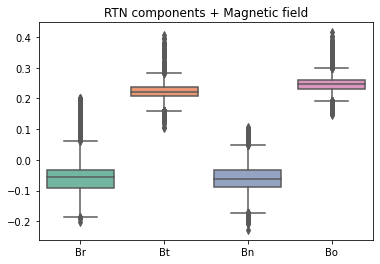

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('RTN components + Magnetic field')
df.drop(['Time'], axis = 1, inplace = True)
ax1 = sns.boxplot(data=df, orient = 'v', palette = 'Set2')

<AxesSubplot:>

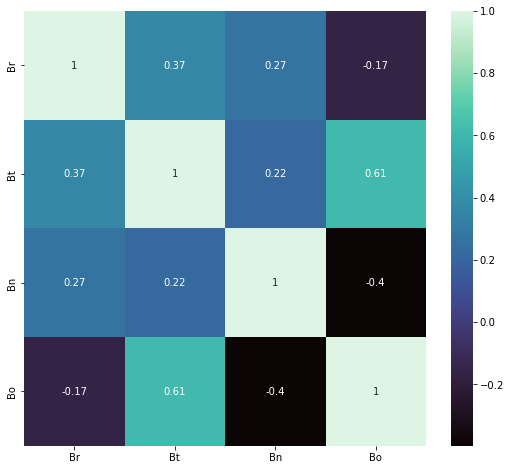

In [18]:
# HeatMap
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(matrix, cmap='mako', annot=True)

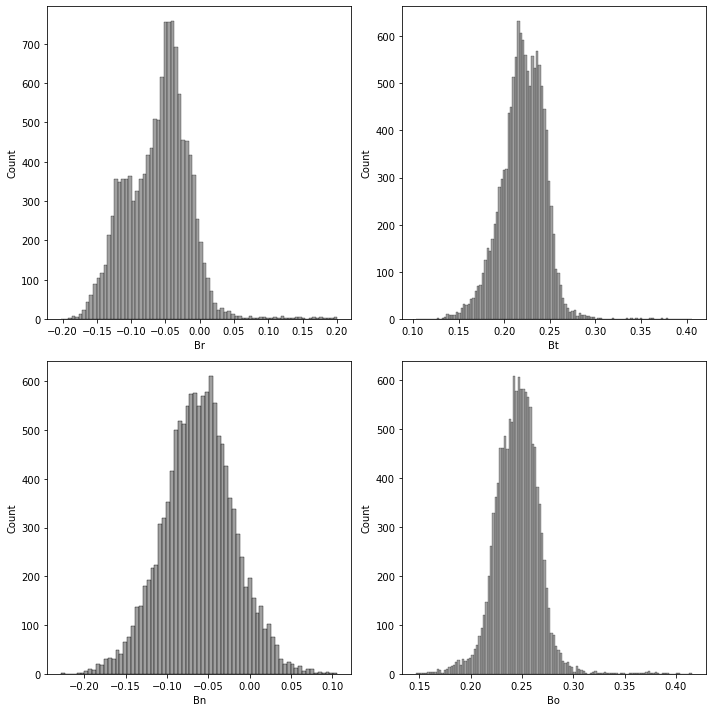

In [7]:
# Distribution
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize=(10,10))
for i in mag:
    plt.subplot(a, b, c)
    sns.histplot(i, color='grey')
    plt.tight_layout()
    c = c + 1
plt.show()

# Lomb-Scargle Periodogram

In [ ]:
# Foi utilizado o pacote do astropy.timeseries para obter a frequência e a potência do LS periodograma.
# https://docs.astropy.org/en/stable/api/astropy.timeseries.LombScargle.html#astropy.timeseries.LombScargle
# syntax: 
# class astropy.timeseries LombScargle(t, y, dy=None, fit_mean=True, center_data=True, nterms=1, normalization='standard')
#                          Compute the Lomb-Scargle Periodogram.
# Note here that the Lomb-Scargle power is always a unitless quantity, because it is 
# related to the χ2 of the best-fit periodic model at each frequency.


# References
# 1. Vanderplas, J., Connolly, A. Ivezic, Z. & Gray, A. Introduction to astroML: Machine learning for astrophysics. Proceedings of the Conference on Intelligent Data Understanding (2012)
# 2. VanderPlas, J. & Ivezic, Z. Periodograms for Multiband Astronomical Time Series. ApJ 812.1:18 (2015)


# gatspy.periodic.LombScargleFast
# https://www.astroml.org/gatspy/periodic/API.html#gatspy.periodic.LombScargleFast
# https://jakevdp.github.io/blog/2015/06/13/lomb-scargle-in-python/
#
# Gatspy's fast Lomb-Scargle is an O[NlogN] algorithm built on a pure Python/numpy 
# implementation of the Press & Rybicki FFT/extirpolation method. Note that a 
# requirement of this fast algorithm is that it be computed on a regular grid of 
# frequencies (not periods), and so to attain this performance it provides the 
# score_frequency_grid() method which takes 3 arguments: the minimum frequency f0, 
# the frequency spacing df, and the number of grid points N.

#Some features of the model:
# - like astroML, it uses an extended periodogram model which correctly accounts for uncorrelated Gaussian measurement error.
# - it takes a regular frequency grid as its argument for the fast computation; note that the score() function itself falls back on the slower LombScargle approach above.
# - like astroML, it uses a floating mean model by default. To compare directly to scipy, set fit_offset=False.

In [ ]:
# Methods Summary

# autofrequency([samples_per_peak, …]) - Determine a suitable frequency grid for data.
# autopower([method, method_kwds, …])  - Compute Lomb-Scargle power at automatically-determined frequencies.
# design_matrix(frequency[, t])        - Compute the design matrix for a given frequency
# distribution(power[, cumulative])    - Expected periodogram distribution under the null hypothesis.
# false_alarm_level(false_alarm_probability[, …]) - Level of maximum at a given false alarm probability.
# false_alarm_probability(power[, method, …])     - False alarm probability of periodogram maxima under the null hypothesis.
# from_timeseries(timeseries[, …])                - Initialize a periodogram from a time series object.
# model(t, frequency)                             - Compute the Lomb-Scargle model at the given frequency.
# model_parameters(frequency[, units])            - Compute the best-fit model parameters at the given frequency.
# offset()                                        - Return the offset of the model
# power(frequency[, normalization, method, …])    - Compute the Lomb-Scargle power at the given frequencies.


### autopower(method='auto', method_kwds=None, normalization=None, samples_per_peak=5, 
#                nyquist_factor=5, minimum_frequency=None, maximum_frequency=None)
#Compute Lomb-Scargle power at automatically-determined frequencies.

# Parameters: methods: tr, optional
#            specify the lomb scargle implementation to use. Options are:

#              ‘auto’: choose the best method based on the input
#              ‘fast’: use the O[N log N] fast method. Note that this requires evenly-spaced frequencies: 
#                      by default this will be checked unless assume_regular_frequency is set to True.
#              ‘slow’: use the O[N^2] pure-python implementation
#              ‘cython’: use the O[N^2] cython implementation. This is slightly faster than method=’slow’, 
#                        but much more memory efficient.
#              ‘chi2’: use the O[N^2] chi2/linear-fitting implementation
#              ‘fastchi2’: use the O[N log N] chi2 implementation. Note that this requires evenly-spaced frequencies: 
#                          by default this will be checked unless assume_regular_frequency is set to True.
#              ‘scipy’: use scipy.signal.lombscargle, which is an O[N^2] implementation written in C. 
#                       Note that this does not support heteroskedastic errors.

# method_kwds: dict, optional
#              additional keywords to pass to the lomb-scargle method

#normalization: {‘standard’, ‘model’, ‘log’, ‘psd’}, optional
#               If specified, override the normalization specified at instantiation.

#samples_per_peak: float, optional
#                  The approximate number of desired samples across the typical peak

#nyquist_factor: float, optional
#                The multiple of the average nyquist frequency used to choose the maximum frequency 
#                if maximum_frequency is not provided.

#minimum_frequency: float or Quantity [:ref: ‘frequency’], optional
#                   If specified, then use this minimum frequency rather than one chosen based on 
#                   the size of the baseline. Should be Quantity if inputs to LombScargle are Quantity.

#maximum_frequency: float or Quantity [:ref: ‘frequency’], optional
#                  If specified, then use this maximum frequency rather than one chosen based on the average 
#                  nyquist frequency. Should be Quantity if inputs to LombScargle are Quantity.

#Returns: frequency, power: ndarray
#         The frequency and Lomb-Scargle power

In [19]:
# lendo o arquivo desejado:
filename = 'foreshock5s.DAT'
df = convertDframe(filename)
df.columns = ['Time','Br','Bt','Bn','Bo']
df.head()

In [6]:
t = df['Time']%1
t = t*24
t.values

array([ 6.     ,  6.00144,  6.00288, ..., 23.99712, 23.99856,  0.     ])

In [10]:
tmin = t.values[0]
tmax = t.values[-2]
print(tmax)

23.99855999999997


Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [18.86679245 23.34490272 23.34490272 23.34490272 23.34490272]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [23.12 23.12 23.12 23.12 23.12]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [ 8.72040698 15.03669173  6.31541053 20.06568562 20.06568562]
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using

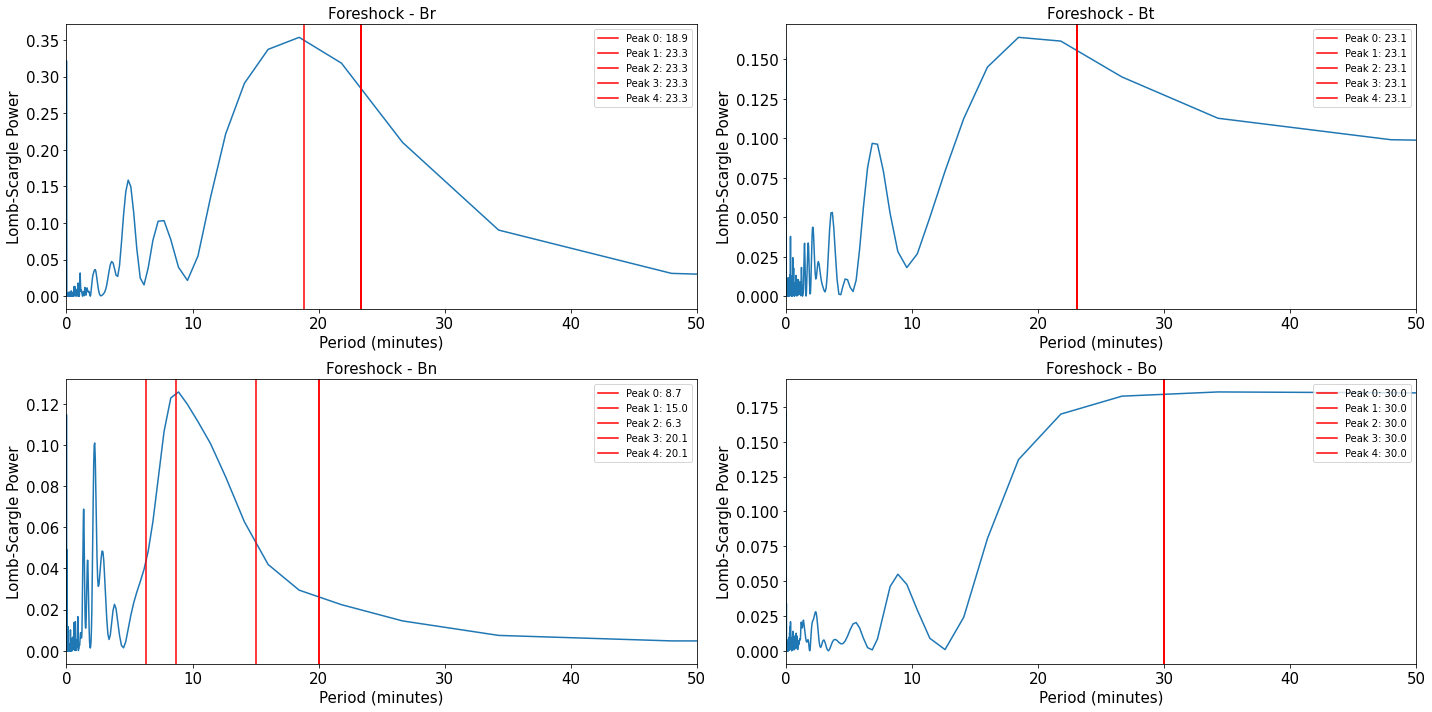

In [11]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))
a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(tmin,tmax) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    frequency, power = LombScargle(t, i, dy=None, fit_mean=False, center_data = True, 
                                   normalization = 'standard').autopower(method = 'fast')


    plt.subplot(a,b,c)
    plt.title('Foreshock - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.1f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()

In [12]:
t = df['Time']%1
t = t*24
print(t.values)

tmin = t.values[0]
tmax = t.values[-2]
print(tmax)

[ 6.       6.00144  6.00288 ... 23.99712 23.99856  0.     ]
23.99855999999997


Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [18.86679245 23.34490272 23.34490272 23.34490272 23.34490272]
Maximum power:  0.3542083740120461
Best frequency:  0.05416991686167843
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 steps
Periods = [23.12 23.12 23.12 23.12 23.12]
Maximum power:  0.16834724371388543
Best frequency:  0.04583608349834329
Finding optimal frequency:
 - Estimated peak width = 0.262
 - Using 5 steps per peak; omega_step = 0.0524
 - User-specified period range:  6 to 24
 - Computing periods at 16 steps
Zooming-in on 10 candidate peaks:
 - Computing periods at 1990 

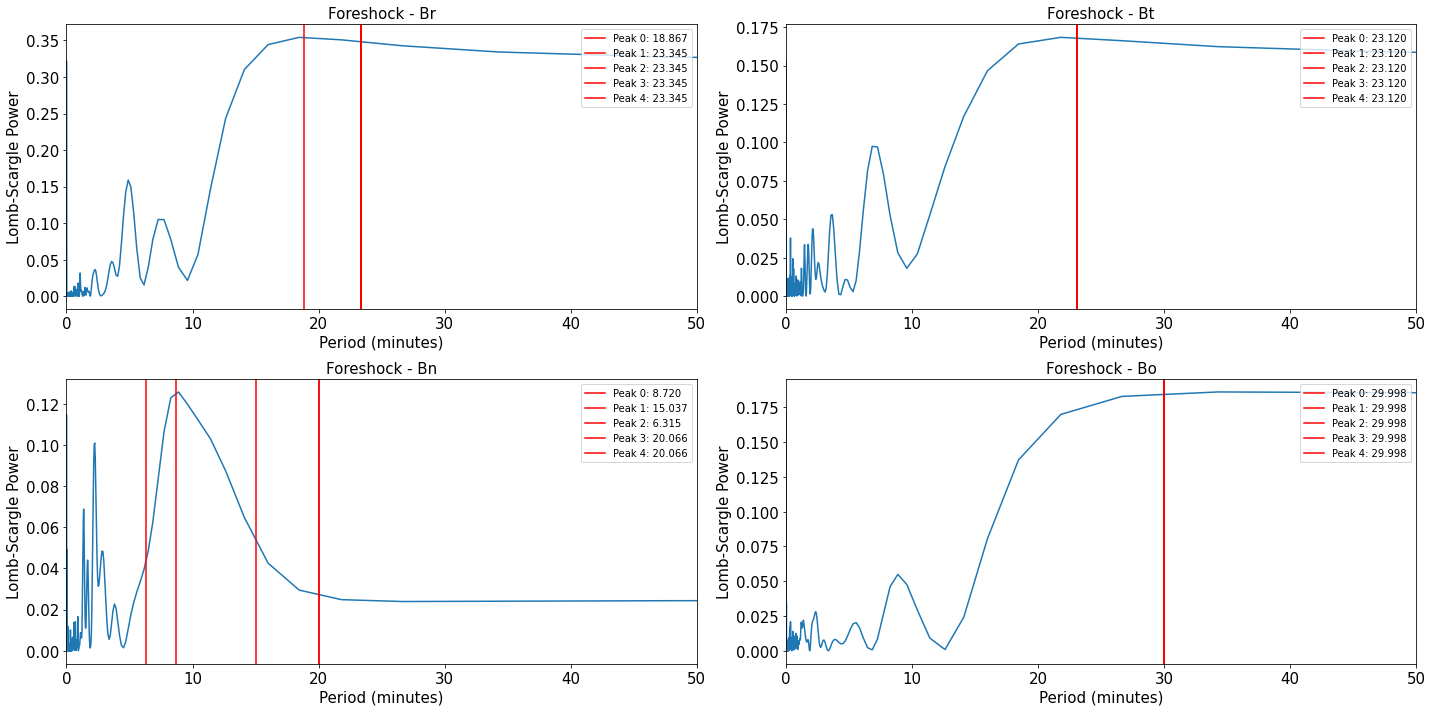

In [16]:
mag = [df['Br'], df['Bt'], df['Bn'], df['Bo']]

fig = plt.figure(figsize = (20,10))

a = 2
b = 2
c = 1
for i in mag:
    # Peaks
    model = LombScargleFast().fit(t, i)
    model.optimizer.period_range=(tmin, tmax) 
    period = model.find_best_periods()
    print('Periods = {}'.format(period))
    
    ls = LombScargle(t, i)
    frequency, power = ls.autopower()
    print('Maximum power: ', power.max())  
    best_frequency = frequency[np.argmax(power)] 
    print('Best frequency: ', best_frequency)

    plt.subplot(a,b,c)
    plt.title('Foreshock - ' + i.name, fontsize = 15)
    plt.xlabel('Period (minutes)', fontsize = 15)
    plt.ylabel('Lomb-Scargle Power', fontsize = 15)
    plt.xlim(0,50)
    #plt.ylim(-0.1, 0.2)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.plot(1./frequency, power)
    plt.tight_layout()
    c = c + 1
    
    # add period legend
    for i in range(len(period)):
        plt.axvline(x=period[i], color='red', label='Peak {}: {:.3f}'.format(i, period[i]))
        plt.legend(loc='upper right')

plt.show()